# Dependencies

Feel free to modify the seed to show different images!  
Just make sure different models are compared on the same set of images.

In [ ]:
import torch
import matplotlib.pyplot as plt
import models
import warnings
import numpy as np
import torchvision.transforms.functional as TF
import torchvision.transforms as standard_transforms
from torchvision import transforms
from torch.utils.data import DataLoader
from data.dataset import VOC, MaskToTensorDefault, palette
from constants import mean_std, best_model_path
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
torch.manual_seed(2025)

# Mapping Class to Color

In [ ]:
noToClass = {
    0:"background", 1:"aeroplane", 2:"bicycle", 3:"bird", 4:"boat", 5:"bottle", 6:"bus", 7:"car", 8:"cat", 9:"chair", 10:"cow", 11:"dining table",
12:"dog", 13:"horse", 14:"motorbike", 15:"person", 16:"potted plant", 17:"sheep", 18:"sofa", 19:"train", 20:"tv/monitor"
}

'''
Convert palette to map class number to RGB color.

Expected output, python dictionary with 21 integer keys, each value being a array of size 3
'''
dicti = {}
c = 0
for i in range(0, len(palette), 3):
    dicti[c] = palette[i:i+3]
    c += 1

palette = dicti

# DataLoading

In [ ]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
mask_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
batch_size = 1
DS = VOC("test", img_transform, mask_transform)
DL = DataLoader(DS, batch_size=batch_size, shuffle=True)

first_batch = iter(DL)

In [5]:
imgs, msks = [], []
for _ in range(5):
    img, msk = next(first_batch)
    imgs.append(img)
    msks.append(msk)

# Show Image

In [6]:
def makeImagesPlotReady(msk, channels = 3):
    """
    Similar to how you converted the images, make the mask tensor matplotlib ready

    args:
        msk or img - input mask tensor of shape [1, 3, 224, 224] or numpy of shape (3, 224, 224)
    returns:
        mask/img - mask that is ready to be plotted using matplotlib.
                    Hint: Numpy class of shape (224, 224, 3)
    """

    return (np.rot90(np.rot90(np.rot90((msk.reshape(channels,224,224)).T))))

In [7]:
output_images = [makeImagesPlotReady(img, 3) for img in imgs]

/tmp/ipykernel_171/1525982468.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  return (np.rot90(np.rot90(np.rot90((msk.reshape(channels,224,224)).T))))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


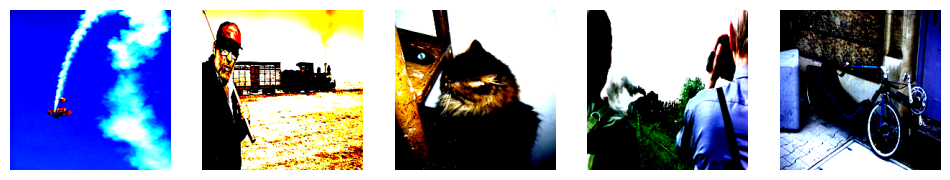

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_images)):
    axs[i].imshow(output_images[i])
    axs[i].axis('off')
plt.show()

# Show Ground Truth Mask

In [9]:
def convertMaskToRGB(msk):
    """
    Given a msk, convert it into rgb for visulization.
    """
    msk = (msk*255).int()
    msk[msk==255]=0
    msk = msk.reshape((224, 224))
    
    mask_rgb = np.zeros((3, 224, 224), dtype=np.uint8) # Empty array to store RGB of each class
        
    for idx, color in palette.items(): # Converting to colors
        for j in range(3): # R,G,B            
            mask_rgb[j][msk == idx] = color[j]
            
    return mask_rgb

In [10]:
output_msks = [makeImagesPlotReady(convertMaskToRGB(msk), 3) for msk in msks]

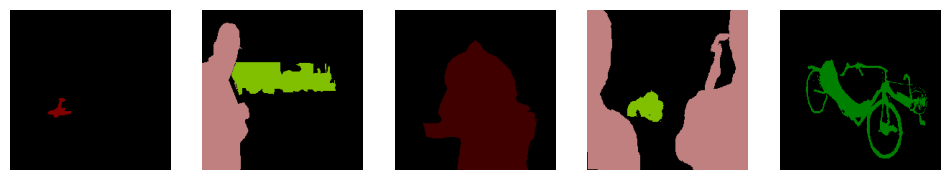

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_msks[i])
    axs[i].axis('off')
plt.show()

# Plot Image with the mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


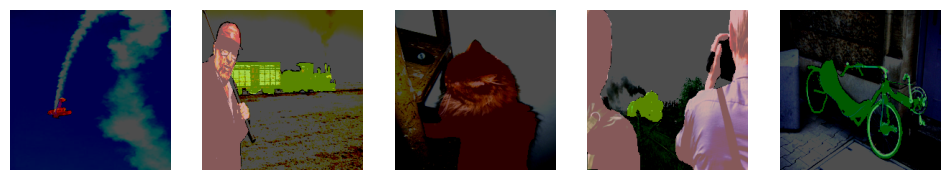

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_msks[i], alpha = 0.7)
    axs[i].axis('off')
plt.show()

## Visualizing the Predicted Masks

In [ ]:
model = models.UNet(21)
model.load_state_dict(torch.load(best_model_path))

<All keys matched successfully>

In [ ]:
compare_dataset = "val"
img_amt = 30
plot_x = 120
plot_y = 80

input_transform = standard_transforms.Compose([
  standard_transforms.ToTensor(),
  standard_transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
mask_transform = transforms.Compose([transforms.ToTensor(),])
img_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# Below for training, don't use for plots
target_transform = MaskToTensorDefault()

In [ ]:
# Default
batch_size = 1
DS_default = VOC("train", img_transform, mask_transform)
DL_default = DataLoader(DS, batch_size=batch_size, shuffle=False)

# Modified Default w train.py transformations (except mask? gives dark img when using target_transform)
DS_mod = VOC(compare_dataset, input_transform, mask_transform)
DL_mod = DataLoader(DS_mod, batch_size=batch_size, shuffle=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()
first_batch = iter(DL_mod)

# Get 5 samples from one batch
imgs_, msks_ = [], []
imgs, msks = [], []
for _ in range(img_amt):
    img, msk = next(first_batch)
    imgs.append(img)
    msks.append(msk)
    imgs_.append(img.unsqueeze(0))
    msks_.append(msk.unsqueeze(0))

imgs_ = torch.cat(imgs_, dim=0)
msks_ = torch.cat(msks_, dim=0)

output_images = [makeImagesPlotReady(img, 3) for img in imgs]
output_msks = [makeImagesPlotReady(convertMaskToRGB(msk), 3) for msk in msks]

# If an extra dimension exists, remove it
if imgs_.dim() == 5: imgs_ = imgs_.squeeze(1)

imgs_ = imgs_.to(device)

# Pass batch to model
pred_msks = model(imgs_)
pred_msks = torch.argmax(pred_msks, dim=1)
print(pred_msks.shape)

def convertMaskToRGB2(msk):
    """
    Given a msk, convert it into rgb for visulization.
    """
    msk[msk==255]=0
    msk = msk.reshape((224, 224))

    mask_rgb = np.zeros((3, 224, 224), dtype=np.uint8) # Empty array to store RGB of each class

    for idx, color in palette.items(): # Converting to RGB
        for j in range(3):
            mask_rgb[j][msk == idx] = color[j]

    return mask_rgb

pred_output_msks = [makeImagesPlotReady(convertMaskToRGB2(msk.cpu()), 3) for msk in pred_msks]

torch.Size([30, 224, 224])


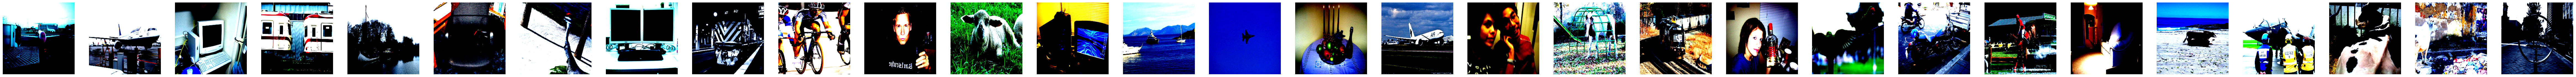

In [53]:
fig, axs = plt.subplots(1, img_amt, figsize=(plot_x, plot_y))
axs = axs.flatten()
for i in range(len(output_images)):
    output_images[i] = (np.clip(output_images[i], 0, 1) * 255).astype(np.uint8)
    axs[i].imshow(output_images[i])
    axs[i].axis('off')
plt.show()

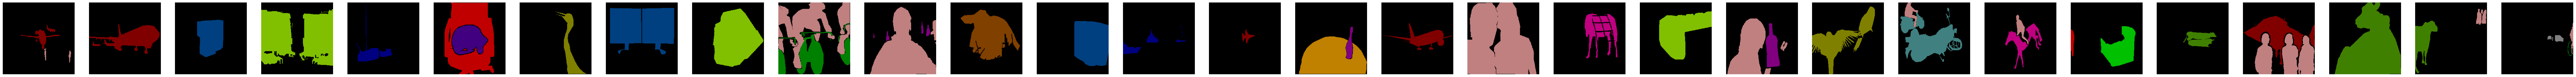

In [54]:
fig, axs = plt.subplots(1, img_amt, figsize=(plot_x, plot_y))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_msks[i])
    axs[i].axis('off')
plt.show()

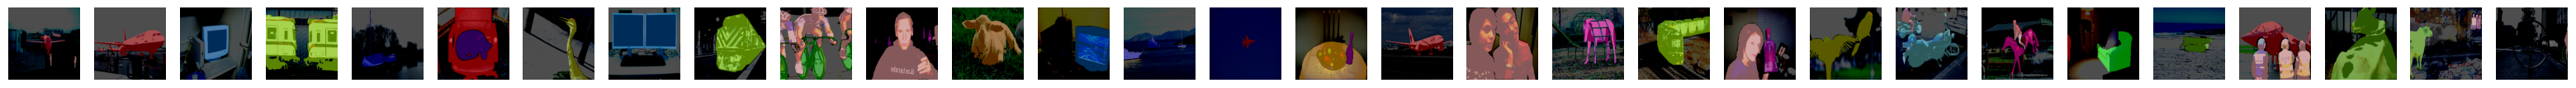

In [55]:
fig, axs = plt.subplots(1, img_amt, figsize=(40, 16))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_msks[i], alpha = 0.7)
    axs[i].axis('off')
plt.show()

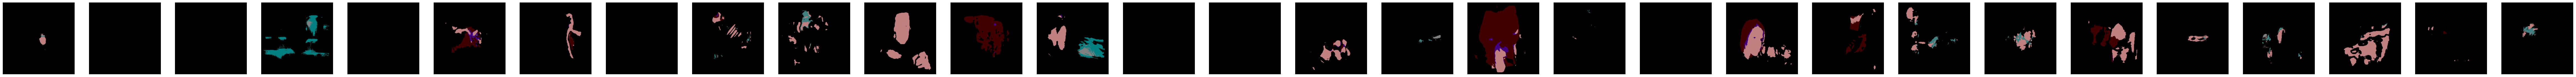

In [56]:
fig, axs = plt.subplots(1, img_amt, figsize=(plot_x, plot_y))
axs = axs.flatten()
for i in range(len(pred_output_msks)):
    axs[i].imshow(pred_output_msks[i])
    axs[i].axis('off')
plt.show()

## Predicted vs Ground-Truth Masks

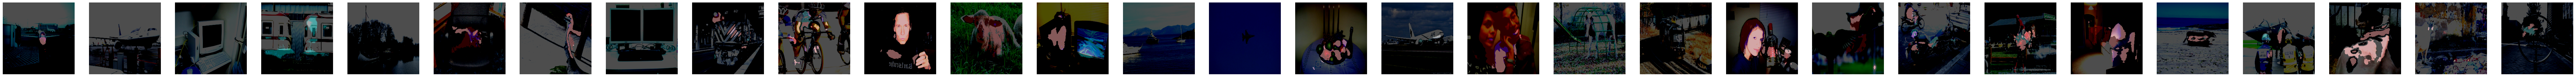

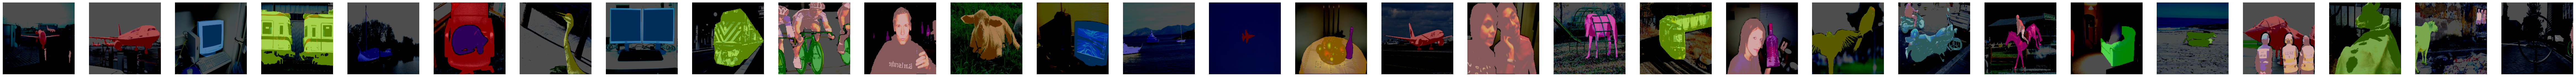

In [ ]:
fig, axs = plt.subplots(1, img_amt, figsize=(plot_x, plot_y))
axs = axs.flatten()
for i in range(len(pred_output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(pred_output_msks[i], alpha = 0.7)
    axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(1, img_amt, figsize=(plot_x, plot_y))
axs = axs.flatten()
for i in range(len(output_msks)):
    axs[i].imshow(output_images[i])
    axs[i].imshow(output_msks[i], alpha = 0.7)
    axs[i].axis('off')
plt.show()